Accuracy:80.00%


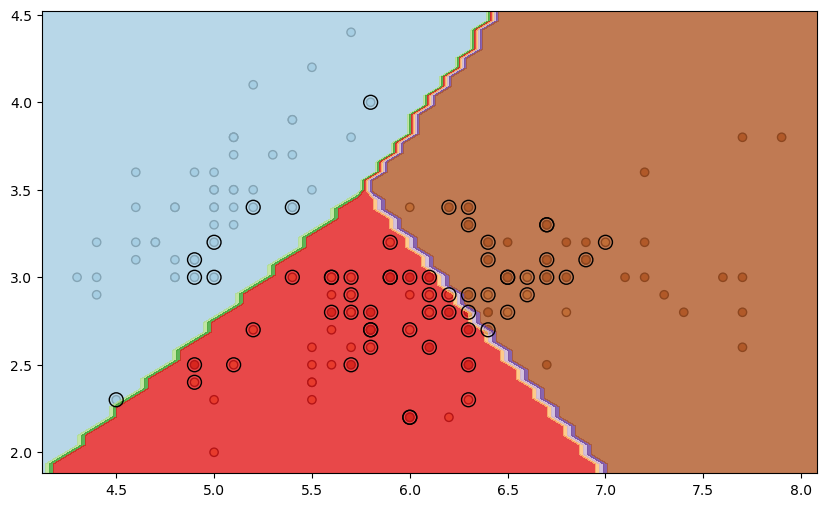

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris=datasets.load_iris()
X=iris.data[:, :2]
y=iris.target
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
clf=SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(f"Accuracy:{accuracy_score(y_test, y_pred)*100:.2f}%")
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
xx=np.linspace(xlim[0], xlim[1], 50)
yy=np.linspace(ylim[0], ylim[1], 50)
YY, XX=np.meshgrid(yy, xx)
xy=np.vstack([XX.ravel(), YY.ravel()]).T
Z=clf.decision_function(xy)
Z=np.argmax(Z, axis=1).reshape(XX.shape)
contour=ax.contourf(XX, YY, Z, alpha=0.8, cmap=plt.cm.Paired)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()